# Poincaré Embeddings for OOPs Dataset

## Mount to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/Poincaré

/content/drive/.shortcut-targets-by-id/17Gn89Edqfyxljr8tO09VdcQWGcUCa_Ua/descriptive_evaluation_project/Poincaré


## Generate Embeddings using Poincaré

### Import Packages and set variables

In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn.cluster import KMeans
import pprint
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
DATASET_CSV = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/Poincaré/oops_dataset.csv'

## Code

In [ ]:
oop_dataset=pd.read_csv(DATASET_CSV, encoding='unicode_escape')
oop_dataset.head()

,EssayText
0,Object-Oriented Programming(OOPs) is a type of...
1,Object-oriented programming (OOP) is a compute...
2,Object-oriented programming is a programming p...
3,Object-oriented programming (OOP) is a program...
4,Object-Oriented Programming or OOPs refers to ...


In [ ]:
# Import required libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

# Prerequisites for cleaning
nltk.download("stopwords")                      # Download stopwords from NLTK library
nltk.download('wordnet')                        # Download wordnet, a lexixal database from NLTK library
stopwords = set(stopwords.words('english'))     # Store stopwords
lemmatizer = WordNetLemmatizer()                # Create object for lemmatization

# Function for standard cleaning of text (remove punctuations, abbreviations, etc.) using regular expressions
def standard_clean(text):
  text = str(text)
  text = text.lower()
  text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "cannot ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r",", " ", text)
  text = re.sub(r"\.", " ", text)
  text = re.sub(r"!", " ! ", text)
  text = re.sub(r"\/", " ", text)
  text = re.sub(r"\^", " ^ ", text)
  text = re.sub(r"\+", " + ", text)
  text = re.sub(r"\-", " - ", text)
  text = re.sub(r"\=", " = ", text)
  text = re.sub(r"'", " ", text)
  text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
  text = re.sub(r":", " : ", text)
  text = re.sub(r" e g ", " eg ", text)
  text = re.sub(r" b g ", " bg ", text)
  text = re.sub(r" u s ", " american ", text)
  text = re.sub(r"\0s", "0", text)
  text = re.sub(r" 9 11 ", "911", text)
  text = re.sub(r"e - mail", "email", text)
  text = re.sub(r"j k", "jk", text)
  text = re.sub(r"\s{2,}", " ", text)
  text = re.sub(r"-", " ", text)
  return text

# Function to remove stopwords from a sentence
def remove_stopwords(text):
  text = text.split()
  clean = ""
  for w in text:
    if w not in stopwords:
      clean = clean + " " + w
  return str(clean[1:])

# Function to lemmatize words of a sentence using Lemmatizer object
def lemmatize(text):
  text = text.split()
  clean = ""
  for w in text:
    clean = clean + " " + lemmatizer.lemmatize(w)
  return str(clean[1:])

# Function to clean the text
def clean(text):
  text = standard_clean(text)
  text = remove_stopwords(text)
  text = lemmatize(text)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
oop_dataset['EssayText'] = oop_dataset['EssayText'].map(lambda x: clean(x))
oop_dataset['EssayText'] = oop_dataset['EssayText'].apply(word_tokenize)
oop_dataset['EssayText'] = oop_dataset['EssayText'].apply(lambda x: ','.join([str(item) for item in x]))
oop_dataset.head()

,EssayText
0,"object,oriented,programming,oops,type,programm..."
1,"object,oriented,programming,oop,computer,progr..."
2,"object,oriented,programming,programming,paradi..."
3,"object,oriented,programming,oop,programming,pa..."
4,"object,oriented,programming,oops,refers,langua..."


In [ ]:
tokenizer = dict()
oop_dataset['EssayText'] = oop_dataset['EssayText'].apply(
    lambda named_entities: [str(named_entitie)
                            for named_entitie in named_entities.split(',')])

oop_dataset.head()

,EssayText
0,"[object, oriented, programming, oops, type, pr..."
1,"[object, oriented, programming, oop, computer,..."
2,"[object, oriented, programming, programming, p..."
3,"[object, oriented, programming, oop, programmi..."
4,"[object, oriented, programming, oops, refers, ..."


In [ ]:
pairs_df = oop_dataset['EssayText'].apply(lambda named_entities: list(itertools.combinations(named_entities, 2)))
pairs_df = pairs_df[pairs_df.apply(len) > 0]
pairs_df = pd.DataFrame(np.concatenate(pairs_df.values), columns=['named_entity_1', 'named_entity_2'])
pairs_df.head(10)

,named_entity_1,named_entity_2
0,object,oriented
1,object,programming
2,object,oops
3,object,type
4,object,programming
5,object,based
6,object,object
7,object,rather
8,object,function
9,object,procedure


In [ ]:
pairs_df[['named_entity_1', 'named_entity_2']].to_csv("edges.tsv", sep = "\t", index=False)

In [ ]:
from gensim.models.poincare import PoincareModel, PoincareRelations
from gensim.test.utils import datapath
file_path = datapath('/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/Poincaré/edges.tsv')
model = PoincareModel(PoincareRelations(file_path), negative=2)
model.train(epochs=50)

In [ ]:
model.kv.save_word2vec_format('test_vectors')

In [ ]:
emb_df = pd.read_csv('test_vectors', sep=' ', skiprows=[0], header=None)
emb_df.set_index(0, inplace=True)
emb_df.index.name = 'named_entity'
emb_df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
named_entity,,,,,,,,,,,,,,,,,,,,,
class,-0.020999,0.000400,-0.010485,-0.008752,-0.008389,-0.008719,-0.019988,0.005912,-0.006443,-0.001702,...,-0.009059,-0.014340,0.007683,0.015011,0.009498,0.012620,0.009515,0.013969,-0.016695,-0.008076
object,-0.015069,0.006549,0.021115,-0.016191,0.007386,-0.003205,0.021235,-0.004783,0.013502,-0.002011,...,-0.003317,-0.011936,-0.031619,0.026116,0.009567,0.016274,0.020398,-0.040106,-0.022253,0.032576
method,0.023781,0.000810,-0.019172,0.020309,0.013135,-0.019972,0.028976,-0.028619,-0.032519,0.010605,...,-0.020553,-0.005231,0.005592,0.043792,0.004238,-0.016589,-0.005648,-0.022233,-0.019375,-0.006523
function,-0.005046,0.003739,-0.072241,-0.003299,0.005835,-0.029579,-0.001851,-0.008598,-0.063047,0.006193,...,-0.037237,-0.041070,0.049215,0.050262,0.016582,-0.000848,-0.001483,0.064560,-0.040428,-0.060621
data,-0.059754,0.025095,0.046120,-0.059785,0.010338,0.074096,-0.011406,0.071173,0.028408,-0.050923,...,-0.003489,-0.006363,-0.055613,0.025732,-0.005116,0.026096,0.035104,0.017249,-0.001769,0.077773


## Manhattan LSTM

### Import Packages

In [ ]:
from time import time
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import re
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import datetime

from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda
import keras.backend as K
# from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
TRAIN_CSV = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/all_codes_test/manh_lstm/train_main.csv'
TEST_CSV = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/all_codes_test/manh_lstm/train_main.csv'
EMBEDDING_FILE = '/content/drive/MyDrive/Engineering/Curriculum/8th Semester/Internship/descriptive_evaluation_project/Poincaré/test_vectors'

In [ ]:
def text_to_word_list(text):
  standard_clean(text)
  text=text.split()
  return text

In [ ]:
# Prepare embedding
vocabulary = dict()
inverse_vocabulary = ['<unk>']  # '<unk>' will never be used, it is only a placeholder for the [0, 0, ....0] embedding
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

questions_cols = ['question1', 'question2']

In [ ]:
train_df = pd.read_csv(TRAIN_CSV)
train_df

,Unnamed: 0,question1,question2,is_duplicate
0,0,Dynamic (run time) polymorphism is the polymor...,Constructor is piece of code which we are usin...,0
1,1,A virtual function or virtual method in an OOP...,"Within a single program, output of a function ...",0
2,2,new: Allocates memory for the object on the fr...,Object is an instance of a class. An object in...,0
3,3,Overloading occurs when two or more methods in...,OOPs allows us to hide implementation details ...,0
4,4,An interface is most certainly not a blueprint...,An interface is better than a abstract class w...,0
...,...,...,...,...
211533,211533,OOPs allows us to hide implementation details ...,"Exception is an abnormal condition. In Java, a...",0
211534,211534,"When Java encounters an exception, it throws i...","An interface is a completely ""abstract class"" ...",0
211535,211535,Copy constructor is called when a new object i...,Overriding occurs when two methods have the sa...,0
211536,211536,Dynamic Polymorphism(Late Binding/ Runtime Pol...,The interface consists of the signatures of me...,0


In [ ]:
test_df = pd.read_csv(TEST_CSV)
test_df

,Unnamed: 0,question1,question2,is_duplicate
0,0,Dynamic (run time) polymorphism is the polymor...,Constructor is piece of code which we are usin...,0
1,1,A virtual function or virtual method in an OOP...,"Within a single program, output of a function ...",0
2,2,new: Allocates memory for the object on the fr...,Object is an instance of a class. An object in...,0
3,3,Overloading occurs when two or more methods in...,OOPs allows us to hide implementation details ...,0
4,4,An interface is most certainly not a blueprint...,An interface is better than a abstract class w...,0
...,...,...,...,...
211533,211533,OOPs allows us to hide implementation details ...,"Exception is an abnormal condition. In Java, a...",0
211534,211534,"When Java encounters an exception, it throws i...","An interface is a completely ""abstract class"" ...",0
211535,211535,Copy constructor is called when a new object i...,Overriding occurs when two methods have the sa...,0
211536,211536,Dynamic Polymorphism(Late Binding/ Runtime Pol...,The interface consists of the signatures of me...,0


In [ ]:


# Iterate over the questions only of both training and test datasets
for dataset in [train_df, test_df]:
    # print(dataset)
    for index, row in dataset.iterrows():

        # Iterate through the text of both questions of the row
        for question in questions_cols:
            # print(question)
            q2n = []  # q2n -> question numbers representation
            for word in text_to_word_list(row[question]):
                # print(word)
                # Check for unwanted words
                if word in stopwords and word not in word2vec.vocab:
                    continue

                if word not in vocabulary:
                    vocabulary[word] = len(inverse_vocabulary)
                    q2n.append(len(inverse_vocabulary))
                    inverse_vocabulary.append(word)
                else:
                    q2n.append(vocabulary[word])

            # Replace questions as word to question as number representation
            dataset.at[index, question] = q2n
            


In [ ]:
embedding_dim = 50
embeddings = 1 * np.random.randn(len(vocabulary) + 1, embedding_dim)  # This will be the embedding matrix
embeddings[0] = 0  # So that the padding will be ignored

# Build the embedding matrix
for word, index in vocabulary.items():
    if word in word2vec.vocab:
        embeddings[index] = word2vec.word_vec(word)

del word2vec

In [ ]:
max_seq_length = max(train_df.question1.map(lambda x: len(x)).max(),
                     train_df.question2.map(lambda x: len(x)).max(),
                     test_df.question1.map(lambda x: len(x)).max(),
                     test_df.question2.map(lambda x: len(x)).max())

# Split to train validation

validation_size = 40000
training_size = len(train_df) - validation_size

X = train_df[questions_cols]
Y = train_df['is_duplicate']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

# Split to dicts
X_train = {'left': X_train.question1, 'right': X_train.question2}
X_validation = {'left': X_validation.question1, 'right': X_validation.question2}
X_test = {'left': test_df.question1, 'right': test_df.question2}

# Convert labels to their numpy representations
Y_train = Y_train.values
Y_validation = Y_validation.values

# Zero padding
for dataset, side in itertools.product([X_train, X_validation], ['left', 'right']):
    dataset[side] = pad_sequences(dataset[side], maxlen=max_seq_length)

# Make sure everything is ok
assert X_train['left'].shape == X_train['right'].shape
assert len(X_train['left']) == len(Y_train)

In [ ]:
# Model variables
from tensorflow.keras.optimizers import Adadelta
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

embedding_layer = Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_length=max_seq_length, trainable=False)

# Embedded version of the inputs
encoded_left = embedding_layer(left_input)
encoded_right = embedding_layer(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Lambda(function=lambda x: exponent_neg_manhattan_distance(x[0], x[1]),output_shape=lambda x: (x[0][0], 1))([left_output, right_output])

# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# Start training
training_start_time = time()

malstm_trained = malstm.fit([X_train['left'], X_train['right']], Y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], Y_validation))

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Epoch 1/25
2681/2681 [==============================] - 237s 85ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 2/25
2681/2681 [==============================] - 225s 84ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 3/25
2681/2681 [==============================] - 223s 83ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 4/25
2681/2681 [==============================] - 225s 84ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 5/25
2681/2681 [==============================] - 223s 83ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 6/25
2681/2681 [==============================] - 226s 84ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 7/25
2681/2681 [==============================] - 224s 83ms/step - loss: 0.0019 - accuracy: 0.9981 - val_loss: 0

In [ ]:
malstm_trained.history['accuracy']
malstm_trained.history['val_accuracy']

[0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132,
 0.9975749850273132]

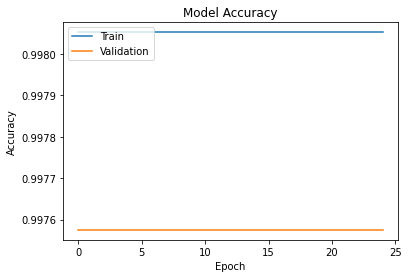

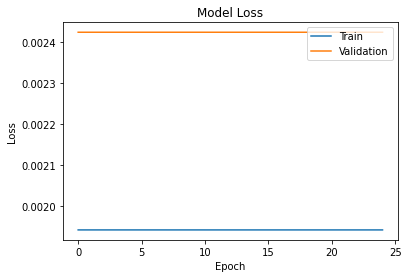

In [ ]:
# Plot accuracy
plt.plot(malstm_trained.history['accuracy'])
plt.plot(malstm_trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained.history['loss'])
plt.plot(malstm_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()